## Importing Relevant Libraries

#### General

In [2]:
import pandas as pd
import numpy as np

#### For clustering

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from scipy.spatial.distance import cdist

#### For principal component analysis

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### For plotting

In [5]:
import matplotlib.pyplot as plt

## Reading in the data

### Read in data from PVL-Delta model

In [6]:
df_pvl_delta = pd.read_csv("./data/parameter_igt_pvl_delta.csv")

#### Inspect

In [7]:
df_pvl_delta.head()

,group,SubID,LR,Outcome_Sens,Response_cons,Loss_Aver
0,young,1,0.159011,0.487522,0.686815,0.954498
1,young,2,0.064666,0.511008,1.391790,0.295529
2,young,3,0.113089,0.465141,0.918734,0.533232
3,young,4,0.089273,0.500391,0.703737,0.869859
4,young,5,0.233898,0.488053,0.897867,0.511095


In [8]:
df_pvl_delta.describe()

,SubID,LR,Outcome_Sens,Response_cons,Loss_Aver
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,0.254555,0.490149,1.047426,0.771240
std,44.311398,0.237008,0.155386,0.400147,0.651220
min,1.000000,0.024038,0.049304,0.590758,0.043900
25%,39.000000,0.089273,0.401523,0.730751,0.282991
50%,77.000000,0.158341,0.490751,0.918049,0.660665
75%,115.000000,0.294708,0.560787,1.284732,1.054360
max,153.000000,0.942930,0.925102,2.449047,4.084854


#### Processing

In [9]:
#Setting the SubID column as the index of the df
df_pvl_delta.set_index('SubID', drop=True, inplace=True)

In [10]:
df_pvl_delta.head()

,group,LR,Outcome_Sens,Response_cons,Loss_Aver
SubID,,,,,
1,young,0.159011,0.487522,0.686815,0.954498
2,young,0.064666,0.511008,1.391790,0.295529
3,young,0.113089,0.465141,0.918734,0.533232
4,young,0.089273,0.500391,0.703737,0.869859
5,young,0.233898,0.488053,0.897867,0.511095


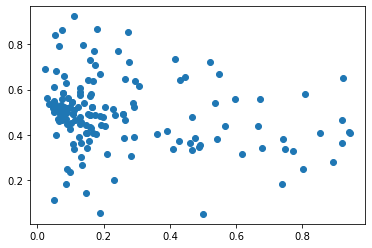

In [11]:
plt.scatter(df_pvl_delta["LR"], df_pvl_delta["Outcome_Sens"])

### Read in data from the ORL model

In [12]:
df_orl = pd.read_csv("./data/parameter_igt_orl.csv")

#### Inspect the data

In [13]:
df_orl.head()

,subjID,A+,A-,K,BetaF,BetaP,A+-A-
0,old,0.324444,0.068862,1.502130,2.523191,-5.547480,0.255581
1,old,0.885744,0.120145,0.012591,3.193244,-9.159800,0.765598
2,old,0.318205,0.078128,1.927309,0.615708,9.272336,0.240077
3,old,0.728192,0.106737,0.388407,2.595746,-2.239555,0.621455
4,old,0.356229,0.091987,1.810674,0.508605,9.825699,0.264241


#### Processing
In order to ensure the datsets are symmetrical, a SubID column is created and used as the index, as above. Due to the absence of the SubID column in this dataset however, this index can not be used to identify subjects across the three dataframes.

In [14]:
df_orl.rename(columns={'subjID':'group'}, inplace=True)
index = pd.DataFrame({'SubID': [i for i in range(1, 154)]})
df_orl = pd.concat([df_orl, index], axis=1)
df_orl.set_index('SubID', drop=True, inplace=True)
df_orl.head()

,group,A+,A-,K,BetaF,BetaP,A+-A-
SubID,,,,,,,
1,old,0.324444,0.068862,1.502130,2.523191,-5.547480,0.255581
2,old,0.885744,0.120145,0.012591,3.193244,-9.159800,0.765598
3,old,0.318205,0.078128,1.927309,0.615708,9.272336,0.240077
4,old,0.728192,0.106737,0.388407,2.595746,-2.239555,0.621455
5,old,0.356229,0.091987,1.810674,0.508605,9.825699,0.264241


### Read in data from the VPP 

In [15]:
df_vpp = pd.read_csv("./data/parameters_igt_vpp.csv")

#### Inspect the data

In [16]:
df_vpp.head()

,group,SubID,LR,Out_Sens,Res_Cons,Loss_Aver,Gain_Impa,Loss_Impa,Deca_Rate,RL_weight
0,young,1,0.038441,0.630402,1.207295,1.050323,-0.535035,-1.913099,0.669323,0.660446
1,young,2,0.045673,0.630331,1.628191,0.205205,-0.133367,-1.423580,0.427207,0.719352
2,young,3,0.045468,0.602974,1.395572,0.383055,-0.344822,-1.719826,0.493249,0.688723
3,young,4,0.035789,0.635677,1.067831,0.823790,-0.229192,-1.484455,0.625835,0.675971
4,young,5,0.060655,0.636276,1.802964,0.329246,-0.616020,-2.561017,0.439912,0.655563


In [17]:
df_vpp.describe()

,SubID,LR,Out_Sens,Res_Cons,Loss_Aver,Gain_Impa,Loss_Impa,Deca_Rate,RL_weight
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,0.070824,0.560575,1.329323,0.952138,0.460940,-0.720379,0.406367,0.622995
std,44.311398,0.064683,0.111139,0.198041,0.580621,1.185591,1.102656,0.187483,0.066657
min,1.000000,0.027454,0.352471,0.879707,0.193857,-2.977630,-2.912838,0.042780,0.452978
25%,39.000000,0.038294,0.448811,1.202790,0.528927,-0.287230,-1.634716,0.256420,0.569390
50%,77.000000,0.050247,0.590334,1.316736,0.760613,0.593115,-0.779120,0.439912,0.640917
75%,115.000000,0.078495,0.646090,1.428836,1.292569,1.419412,0.137599,0.565139,0.675971
max,153.000000,0.617431,0.818137,1.938694,2.698527,2.559126,1.583109,0.858421,0.744017


#### Processing
Same format as previous two data frames is used.

In [18]:
df_vpp.set_index('SubID', drop=True, inplace=True)
df_vpp.head()

,group,LR,Out_Sens,Res_Cons,Loss_Aver,Gain_Impa,Loss_Impa,Deca_Rate,RL_weight
SubID,,,,,,,,,
1,young,0.038441,0.630402,1.207295,1.050323,-0.535035,-1.913099,0.669323,0.660446
2,young,0.045673,0.630331,1.628191,0.205205,-0.133367,-1.423580,0.427207,0.719352
3,young,0.045468,0.602974,1.395572,0.383055,-0.344822,-1.719826,0.493249,0.688723
4,young,0.035789,0.635677,1.067831,0.823790,-0.229192,-1.484455,0.625835,0.675971
5,young,0.060655,0.636276,1.802964,0.329246,-0.616020,-2.561017,0.439912,0.655563


## Determining the best number of clusters

#### Set up the data for clustering

In [14]:
train_x = df_pvl_delta.iloc[:, 2:]

In [15]:
train_x.head()

,LR,Outcome_Sens,Response_cons,Loss_Aver
0,0.159011,0.487522,0.686815,0.954498
1,0.064666,0.511008,1.391790,0.295529
2,0.113089,0.465141,0.918734,0.533232
3,0.089273,0.500391,0.703737,0.869859
4,0.233898,0.488053,0.897867,0.511095


In [16]:
train_x.describe()

,LR,Outcome_Sens,Response_cons,Loss_Aver
count,153.000000,153.000000,153.000000,153.000000
mean,0.254555,0.490149,1.047426,0.771240
std,0.237008,0.155386,0.400147,0.651220
min,0.024038,0.049304,0.590758,0.043900
25%,0.089273,0.401523,0.730751,0.282991
50%,0.158341,0.490751,0.918049,0.660665
75%,0.294708,0.560787,1.284732,1.054360
max,0.942930,0.925102,2.449047,4.084854


## Create an elbow curve to determine the best number of clusters

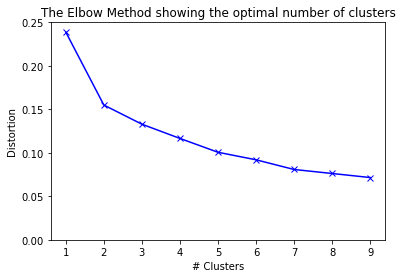

In [17]:
col_1 = train_x.iloc[:, 0]
col_2 = train_x.iloc[:, 1]

# create new plot and data
X = np.array(list(zip(col_1, col_2))).reshape(len(col_1), 2)

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('# Clusters')
plt.ylabel('Distortion')
plt.ylim([0, 0.25])
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

### Use the above graph to set the number of clusters

In [18]:
num_clusters = 7

## Find out which of the 7 clusters each df row is in

#### Cluster the data

In [19]:
clustering = SpectralClustering(n_clusters=num_clusters, assign_labels="discretize", random_state=0).fit(train_x)
clusters_label = pd.DataFrame(clustering.labels_).rename(columns={0: "Cluster"})

#### Add a new column to the original data with the cluster each row is in

In [20]:
full_df = pd.concat([df_pvl_delta, clusters_label], axis=1)

In [21]:
full_df.head()

,group,SubID,LR,Outcome_Sens,Response_cons,Loss_Aver,Cluster
0,young,1,0.159011,0.487522,0.686815,0.954498,4
1,young,2,0.064666,0.511008,1.391790,0.295529,6
2,young,3,0.113089,0.465141,0.918734,0.533232,4
3,young,4,0.089273,0.500391,0.703737,0.869859,4
4,young,5,0.233898,0.488053,0.897867,0.511095,4


## Principal Component Analysis
According to Lili's paper, the best-fitting model was the VPP model. There are eight parameters in this model so princiapl component analysis is performed below on the data before performing Spectral clustering.

#### Inspect dataframe which PCA is being performed on

In [25]:
df_vpp.head()

,group,LR,Out_Sens,Res_Cons,Loss_Aver,Gain_Impa,Loss_Impa,Deca_Rate,RL_weight
SubID,,,,,,,,,
1,young,0.038441,0.630402,1.207295,1.050323,-0.535035,-1.913099,0.669323,0.660446
2,young,0.045673,0.630331,1.628191,0.205205,-0.133367,-1.423580,0.427207,0.719352
3,young,0.045468,0.602974,1.395572,0.383055,-0.344822,-1.719826,0.493249,0.688723
4,young,0.035789,0.635677,1.067831,0.823790,-0.229192,-1.484455,0.625835,0.675971
5,young,0.060655,0.636276,1.802964,0.329246,-0.616020,-2.561017,0.439912,0.655563


#### Standardising the data

In [26]:
#List of features with 'group' and 'A+-A-' fields excluded; the latter is excluded as it is an aggregation of 'A+' and 'A-'
features = df_vpp.columns[1:-1]

# Forming an array of features
x = df_vpp.loc[:, features].values
# Separating out the target
#y = df_orl.loc[:,['group']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#### PCA projection to 2D

In [27]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

finalDf = pd.concat([principalDf, df_vpp[['group']]], axis = 1)

#### Visualise 2D projection

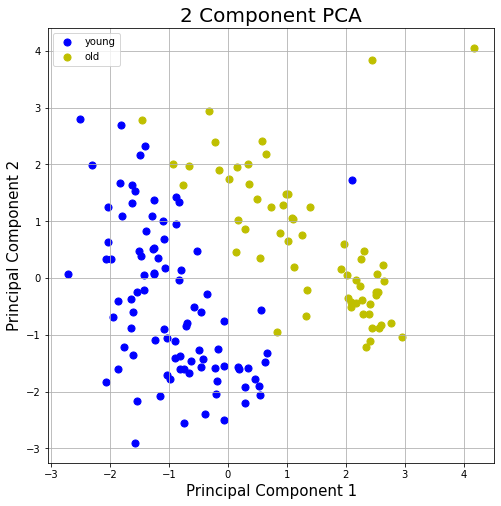

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['young', 'old']
colors = ['b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['group'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Explained Variance

In [29]:
pca.explained_variance_ratio_

array([0.32732893, 0.28173918])

## Plot the clusters

#### Choose the columns to plot

In [27]:
x = full_df.iloc[:, 2]
y = full_df.iloc[:, 3]

#### Plot the original data

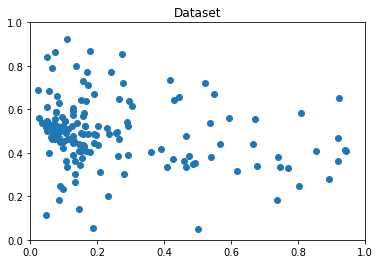

In [28]:
plt.plot()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Dataset')
plt.scatter(x, y)
plt.show()

#### Plot this data with the clusters

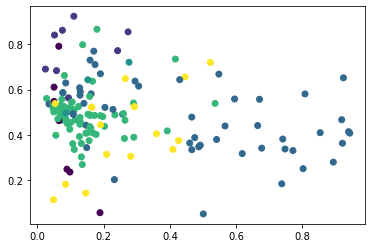

In [29]:
plt.scatter(x, y, c=full_df["Cluster"])

#### Plot this data with the clusters and their centroids

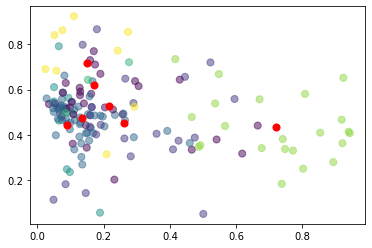

In [30]:
kmeans = KMeans(n_clusters=num_clusters).fit(train_x)
centroids = kmeans.cluster_centers_

plt.scatter(x, y, c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## See how the 'Old' and 'Young' fall into these clusters

In [31]:
full_df.head()

,group,SubID,LR,Outcome_Sens,Response_cons,Loss_Aver,Cluster
0,young,1,0.159011,0.487522,0.686815,0.954498,4
1,young,2,0.064666,0.511008,1.391790,0.295529,6
2,young,3,0.113089,0.465141,0.918734,0.533232,4
3,young,4,0.089273,0.500391,0.703737,0.869859,4
4,young,5,0.233898,0.488053,0.897867,0.511095,4


#### Create a dataframe showing how many people people fell into each cluster

In [32]:
all_cluster_df = pd.DataFrame(full_df[["group", "Cluster"]].groupby("Cluster").count()).rename(columns={"group": "All"})

#### Change 'young' to 1 and 'old' to np.nan

In [33]:
full_df["group"] = full_df["group"].replace('old', np.nan).replace('young', 1)
full_df.head()

,group,SubID,LR,Outcome_Sens,Response_cons,Loss_Aver,Cluster
0,1.0,1,0.159011,0.487522,0.686815,0.954498,4
1,1.0,2,0.064666,0.511008,1.391790,0.295529,6
2,1.0,3,0.113089,0.465141,0.918734,0.533232,4
3,1.0,4,0.089273,0.500391,0.703737,0.869859,4
4,1.0,5,0.233898,0.488053,0.897867,0.511095,4


#### Create a dataframe showing how many young people fell into each cluster

In [34]:
young_cluster_df = pd.DataFrame(full_df[["group", "Cluster"]].groupby("Cluster").count()).rename(columns={"group": "Young"})

#### Create a dataframe showing how many old people fell into each cluster

In [35]:
old_cluster_df = pd.DataFrame(full_df["group"].isnull().groupby(full_df["Cluster"]).sum().astype(int)).rename(columns={"group": "Old"})

#### Output how many 'young' and 'old' people fell into each cluster

In [36]:
pd.merge(all_cluster_df, pd.merge(young_cluster_df, old_cluster_df, how="inner", on="Cluster"), how="inner", on="Cluster")

,All,Young,Old
Cluster,,,
0,7,4,3
1,8,5,3
2,51,26,25
3,3,3,0
4,67,48,19
6,17,4,13
